In [1]:
import numpy as np
import pandas as pd
import warnings #ignore warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
wine_data = pd.read_csv('/content/drive/MyDrive/csv4/wine-quality-white-and-red.csv')

### **Head**

In [4]:
wine_data.type.unique()

map = {"white":1, "red":0}
wine_data["type"] = wine_data["type"].map(map)

#wine_data = wine_data.drop("type", axis=1)

In [5]:
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### **Shape**

In [6]:
wine_data.shape

(6497, 13)

### **Statistical Overview**

In [7]:
wine_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
wine_data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

### **Unique Values Of Quality(Target Value) **

In [9]:
wine_data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [10]:
wine_data['quality'].nunique()

7

### **Frequency Counts of each Quality Value**

In [11]:
wine_data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### **Renaming Columns**

In [12]:
wine_data.rename(columns= {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
      'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide',})

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### **Checking for Missing Values**

In [13]:
wine_data.isna()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [16]:
duplicate = wine_data[wine_data.duplicated()]
duplicate.shape

(1177, 13)

### **Data Visualization **

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Separating Input and Target Variables **

In [18]:
y = wine_data['quality']
x = wine_data.drop(wine_data['quality'], inplace=True)

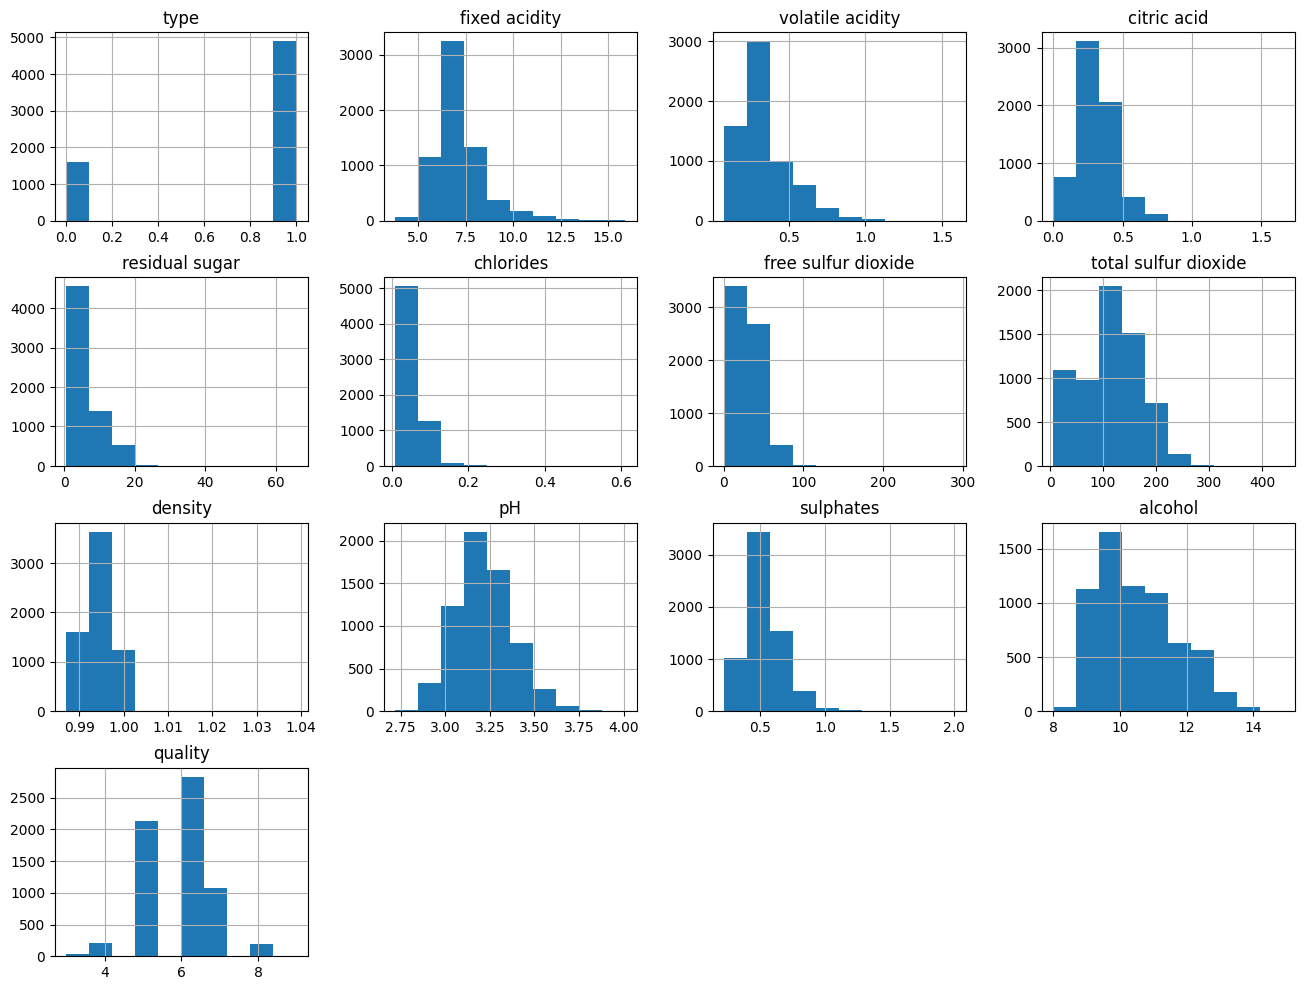

In [19]:
wine_data.hist(bins=10,figsize=(16,12))
plt.show()

### **Correlation Matrix with Heatmap**

In [20]:
wine_data.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.486876,-0.652959,0.187401,0.348915,-0.512675,0.471710,0.700365,-0.391067,-0.329141,-0.487042,0.033329,0.119219
fixed acidity,-0.486876,1.000000,0.219134,0.324295,-0.112017,0.298238,-0.282914,-0.329104,0.459207,-0.252823,0.299704,-0.095725,-0.076747
volatile acidity,-0.652959,0.219134,1.000000,-0.377975,-0.195988,0.377118,-0.352504,-0.414331,0.271599,0.261442,0.225733,-0.037867,-0.265640
citric acid,0.187401,0.324295,-0.377975,1.000000,0.142616,0.039026,0.133179,0.195350,0.096153,-0.329937,0.056300,-0.010564,0.085526
residual sugar,0.348915,-0.112017,-0.195988,0.142616,1.000000,-0.128970,0.402647,0.495475,0.552083,-0.266857,-0.185758,-0.359074,-0.037129
chlorides,-0.512675,0.298238,0.377118,0.039026,-0.128970,1.000000,-0.195115,-0.279678,0.362839,0.044666,0.395605,-0.257112,-0.200637
free sulfur dioxide,0.471710,-0.282914,-0.352504,0.133179,0.402647,-0.195115,1.000000,0.720930,0.025344,-0.145622,-0.188281,-0.179735,0.055429
total sulfur dioxide,0.700365,-0.329104,-0.414331,0.195350,0.495475,-0.279678,0.720930,1.000000,0.032015,-0.238263,-0.275437,-0.265466,-0.041528
density,-0.391067,0.459207,0.271599,0.096153,0.552083,0.362839,0.025344,0.032015,1.000000,0.012165,0.259870,-0.686702,-0.306054
pH,-0.329141,-0.252823,0.261442,-0.329937,-0.266857,0.044666,-0.145622,-0.238263,0.012165,1.000000,0.192067,0.121033,0.019547


<Axes: >

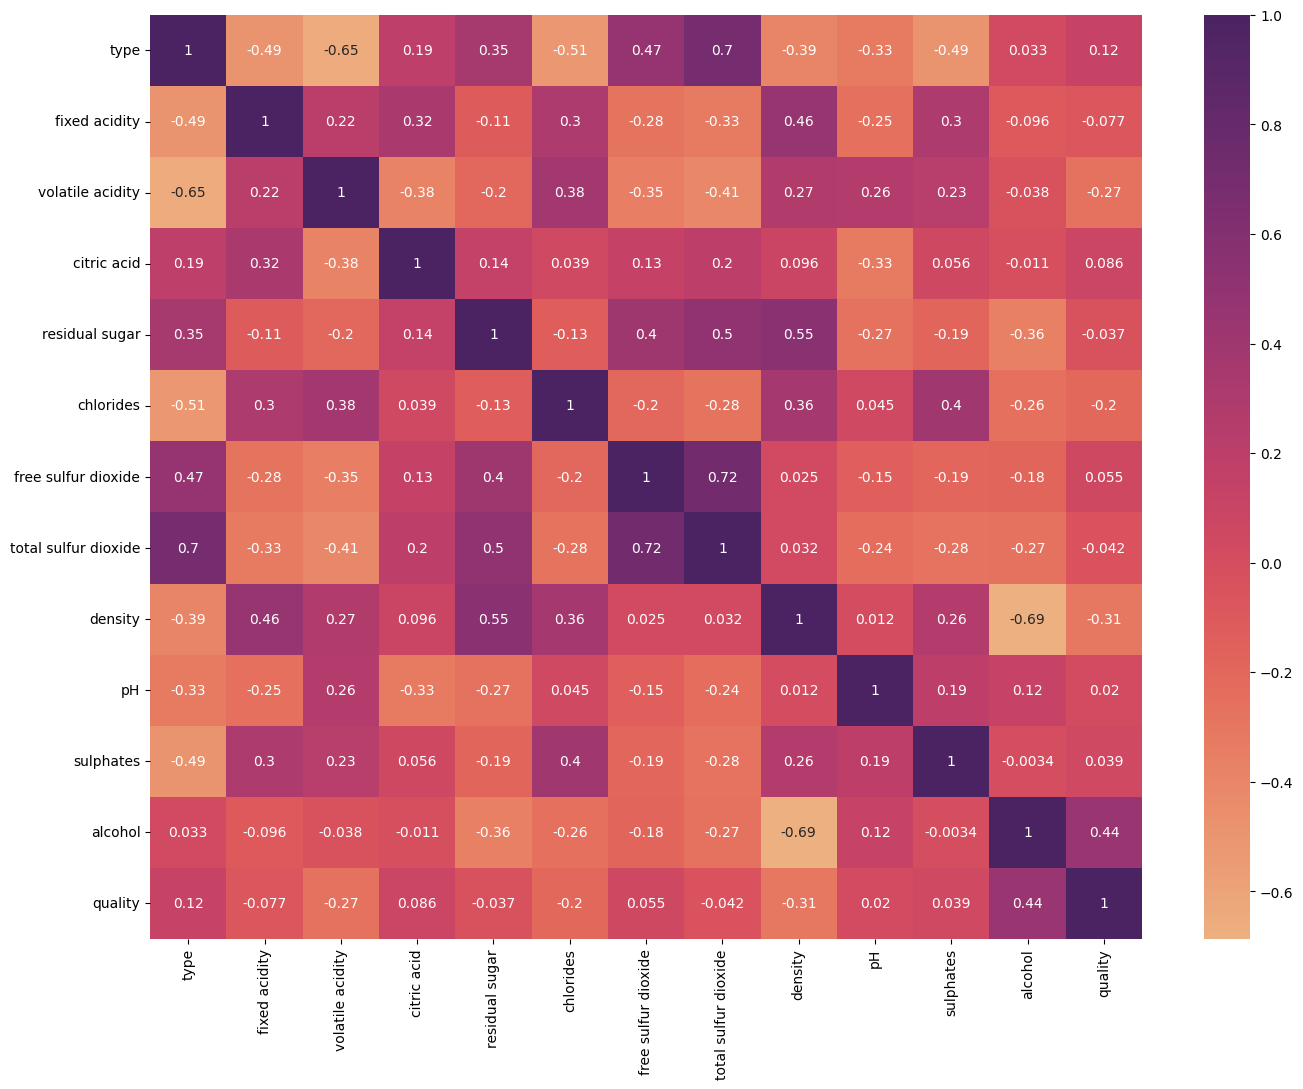

In [21]:
plt.figure(figsize=(16,12))
sns.heatmap(wine_data.corr(), cmap= 'flare', annot=True)

### **Pair Plot**

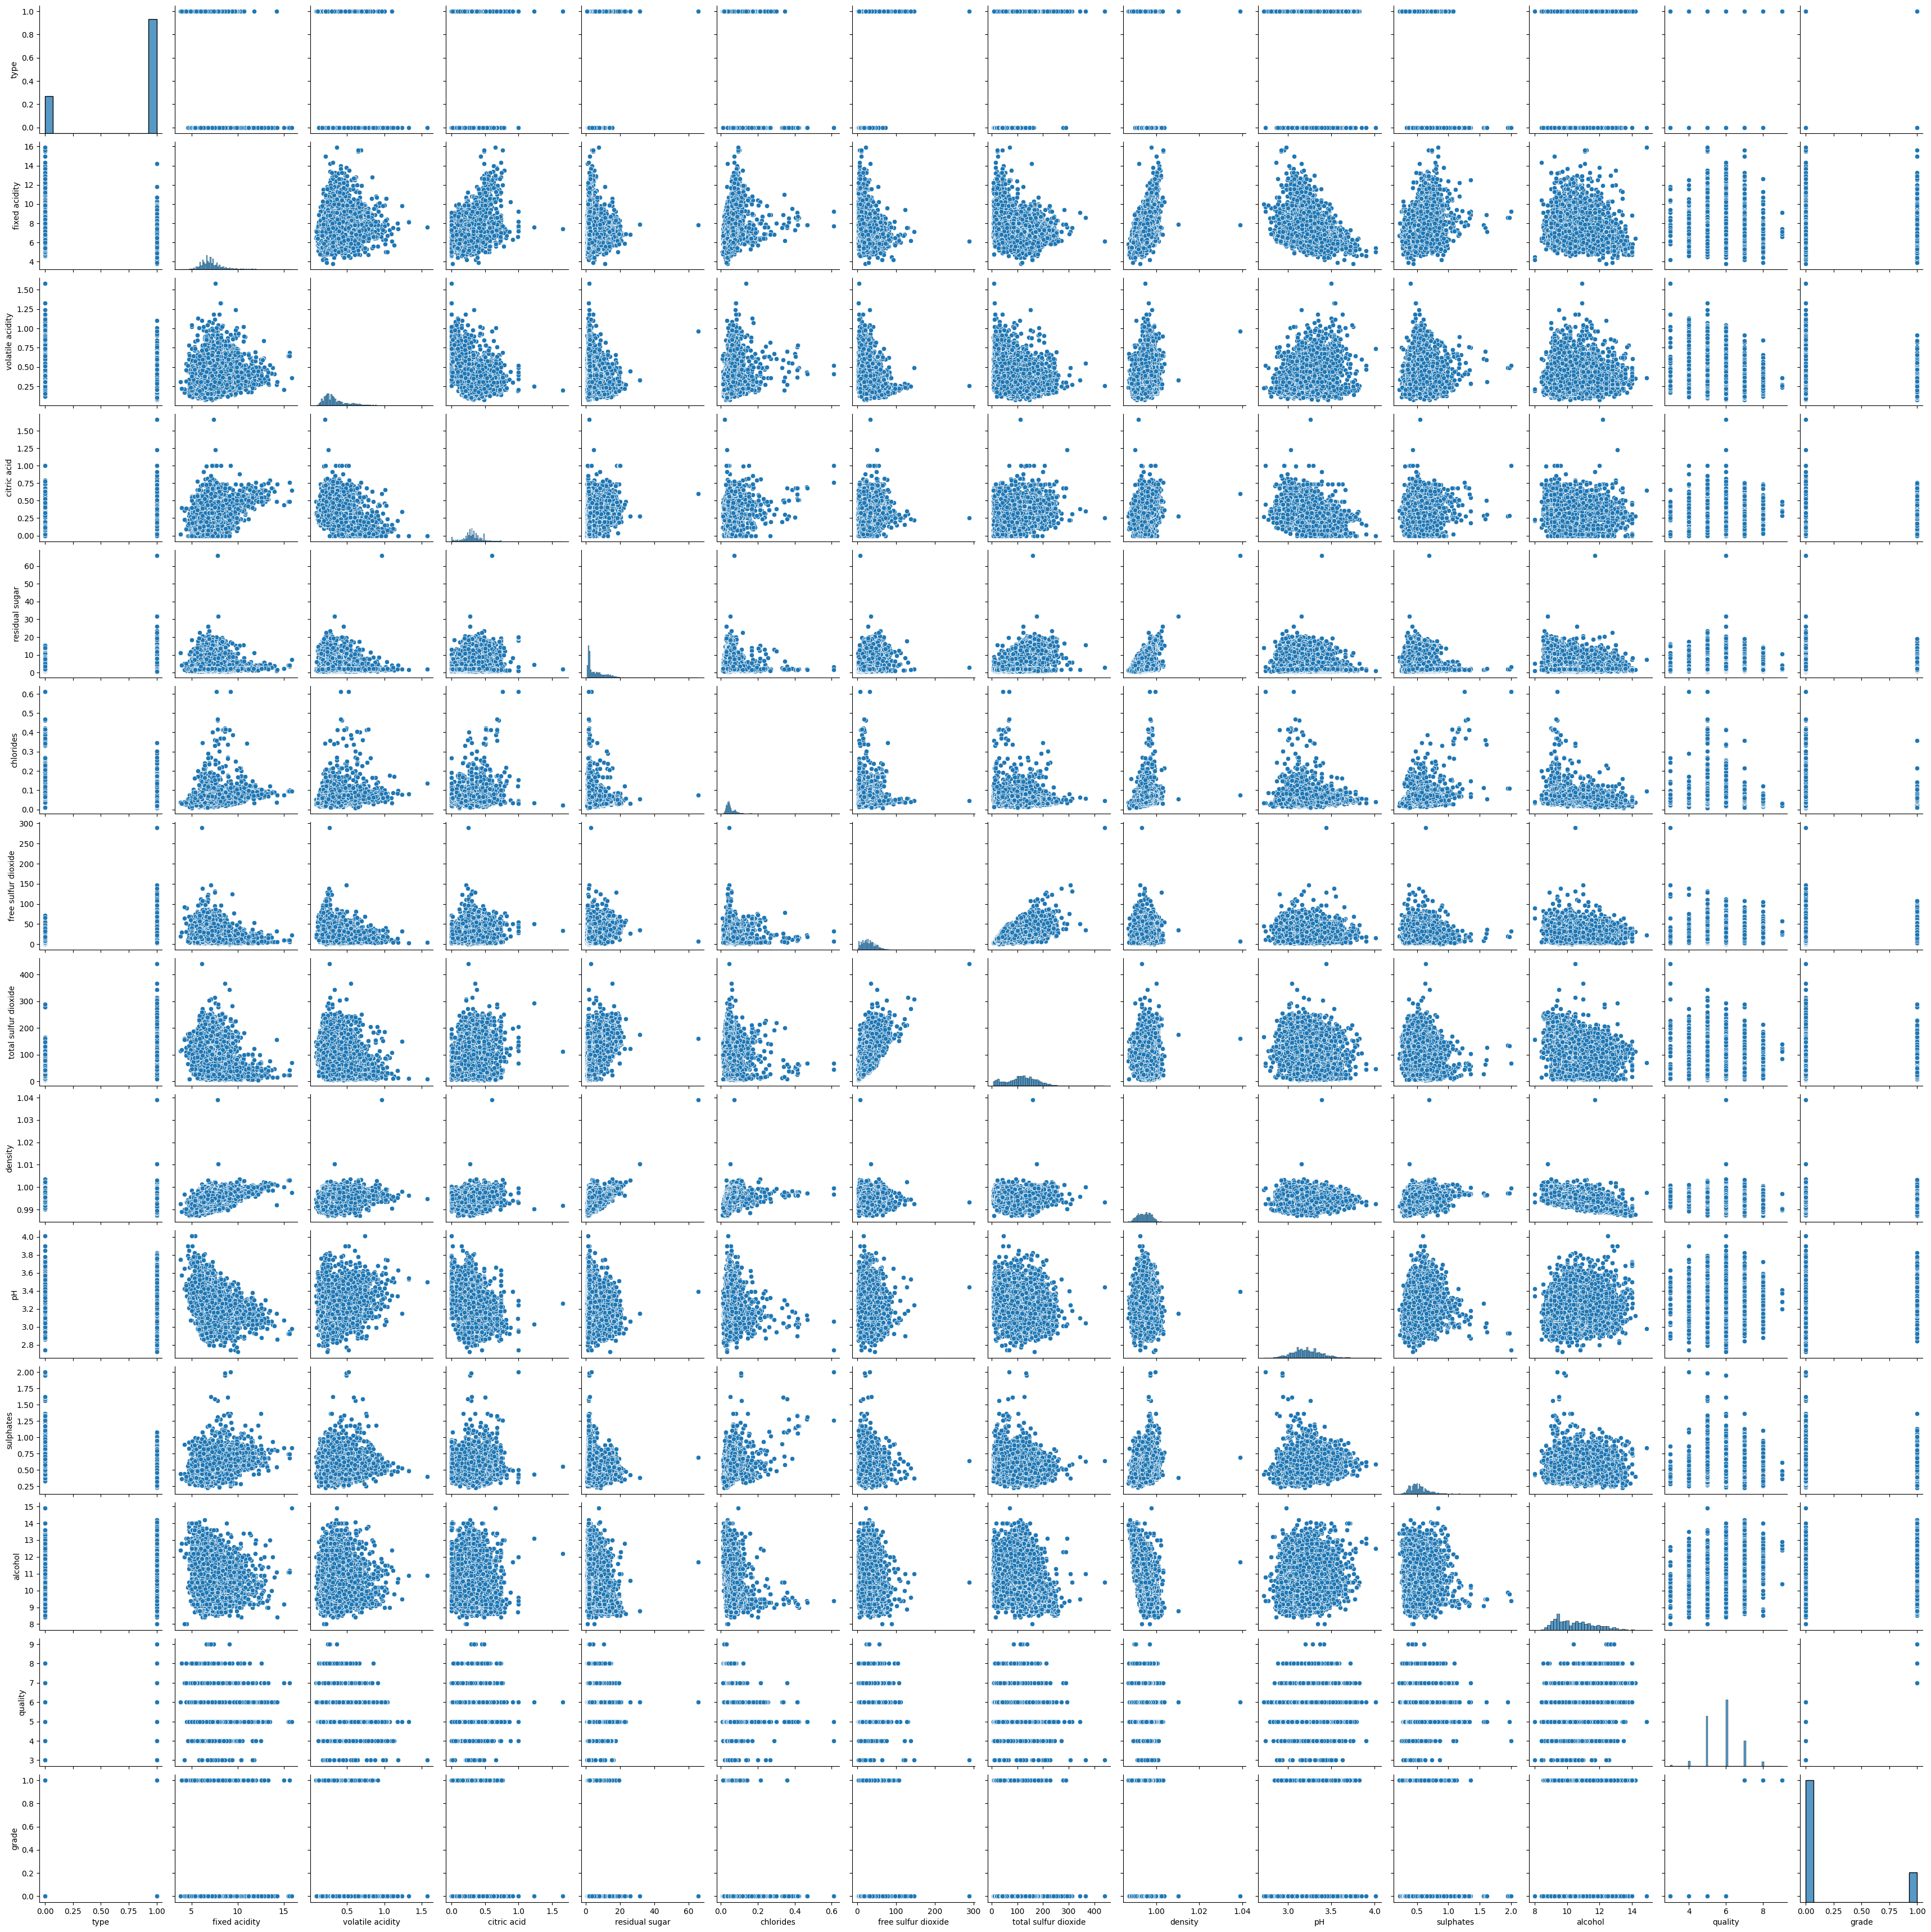

In [53]:
sns.pairplot(wine_data)

### **Box PLot**

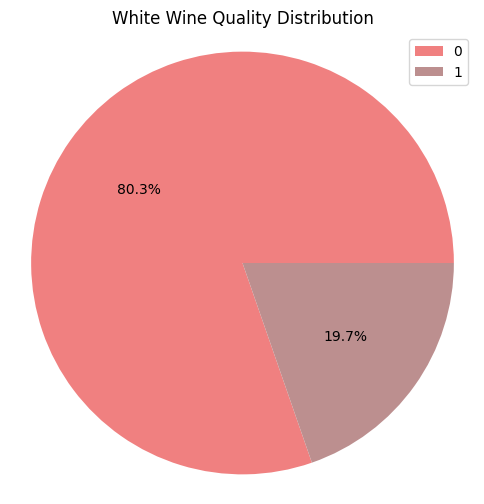

The amount of good quality white wine is 19.7 %.
Mean White Wine quality =  5.818181818181818


In [23]:
#Grouping the Wine based data on grade
#Defining The 'grade' of wine

#Good Quality Wine
wine_data['grade'] = 1

#Poor Quaality Wine
wine_data.grade[wine_data.quality < 6.5] = 0

#sns.set(style = "whitegrid")
#p = sns.countplot(data=wine_data, x='grade', palette='muted')

#set plotsize and colors

plt.figure(figsize=(6,6))
colors = ['lightcoral','rosybrown']

labels = wine_data.grade.value_counts().index
plt.pie(wine_data.grade.value_counts(), autopct='%1.1f%%',colors=colors)
plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('White Wine Quality Distribution')
plt.show()
#show mean quality of white wine and quality distribution

print('The amount of good quality white wine is', round(wine_data.grade.value_counts(normalize=True)[1]*100,1),'%.')
print('Mean White Wine quality = ', wine_data["quality"].mean()) 

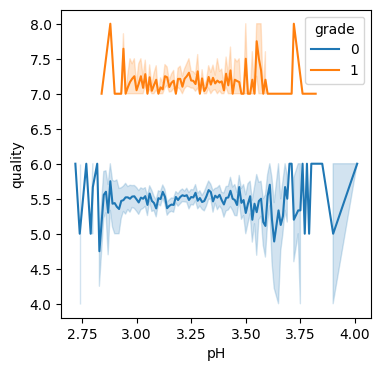

In [24]:
#Plot to see how pH is varying in the grade of white wine

plt.figure(figsize=(4,4))
ax = sns.lineplot(x="pH", y="quality", hue="grade", data=wine_data, markers=True)

In [25]:
wine_data['grade'].value_counts() #Print the Counts of good and poor white wine

0    5213
1    1277
Name: grade, dtype: int64

Now, **Predicting White Wine Quality** using:



1.   Random Forest Classifier
2.   Gaussian Naive Bayes Classifier
3.   Decision Tree Classifier
4.   KNeighbors Classifier
5.   SVM Classifier








In [26]:
#Checking once more for column names
wine_data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'grade'],
      dtype='object')

In [27]:
#Defining X and y
X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

In [28]:
#Creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Checking Split
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (5192, 13)
y_train: (5192,)
X_test: (1298, 13)
y_test: (1298,)


In [29]:
print(X_train)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
954      1            7.6             0.220         0.34             9.7   
884      1            6.8             0.230         0.29            12.2   
5867     0            6.7             0.560         0.09             2.9   
6064     0            9.9             0.540         0.26             2.0   
300      1            6.1             0.410         0.00             1.6   
...    ...            ...               ...          ...             ...   
3779     1            6.5             0.320         0.45             7.7   
5198     0            7.5             0.530         0.06             2.6   
5233     0           11.9             0.695         0.53             3.4   
5397     0            8.7             0.690         0.31             3.0   
867      1            7.8             0.180         0.46            12.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
954       

In [30]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf= RandomForestClassifier(n_jobs=2, random_state=42)

#Train the Classifier 
clf.fit(X_train, y_train)

#Predicting the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test, y_test)*100, 2)

#Accuracy Calculation
from sklearn import metrics
print("Random Forest Classifier Accuracy:", metrics.accuracy_score(y_test, y_pred)*100, "%")

Random Forest Classifier Accuracy: 81.35593220338984 %


In [31]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the Classifier 
gnb.fit(X_train, y_train)

#Predicting the response
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test, y_test)*100, 2)

#Accuracy Calculation
from sklearn import metrics
print("Gaussian Classifier Accuracy:", metrics.accuracy_score(y_test, y_pred)*100, "%")

Gaussian Classifier Accuracy: 58.62865947611711 %


In [32]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Create Decision Tree Classifier
dtf = DecisionTreeClassifier(max_depth=10)

#Train the Classifier 
dtf.fit(X_train, y_train)

#Predicting the response
y_pred = dtf.predict(X_test)
acc_dtf = round(dtf.score(X_test, y_test)*100, 2)

#Accuracy Calculation
from sklearn.metrics import accuracy_score
print("Decision Tree Classifier Accuracy:", metrics.accuracy_score(y_test, y_pred)*100, "%")

Decision Tree Classifier Accuracy: 71.64869029275809 %


In [33]:
#KNN
import sys, os
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Learning Model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

#Train the Classifier 
knn.fit(X_train, y_train)

#Predicting the response
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test)*100, 2)

#Accuracy Calculation
print('KNN Accuracy:', metrics.accuracy_score(y_test, y_pred)*100, "%")

KNN Accuracy: 50.693374422187986 %


In [34]:
#SUPPORT VECTOR MACHINE 
import sys, os
from sklearn import svm
from sklearn.svm import SVC

#Create Decision Tree Classifier
sv = SVC(C=1, kernel='rbf')

#Train the Classifier 
sv.fit(X_train, y_train)

#Predicting the response
y_pred = sv.predict(X_test)
acc_sv = round(sv.score(X_test, y_test)*100, 2)

#Accuracy Calculation
from sklearn.metrics import accuracy_score
print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred)*100, "%")

SVM Accuracy: 44.37596302003082 %


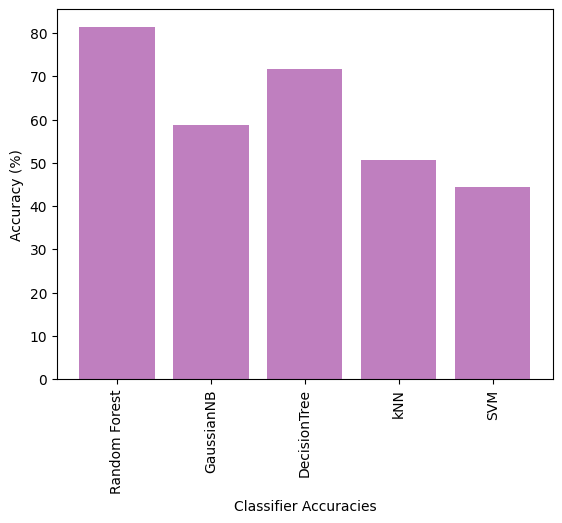

In [35]:
#Visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dtf, acc_knn, acc_sv]

plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='purple')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.xlabel('Classifier Accuracies')
plt.show()

In [36]:
#Printing Top Three Accuracies

print('Decision Tree:', acc_dtf, '%')
print('Random Forest:', acc_rf,'%')
print('GaussianNB:', acc_gnb,"%")

Decision Tree: 71.65 %
Random Forest: 81.36 %
GaussianNB: 58.63 %


Reducing Over-Fitting using Cross Validation for top Three Algorithms -->>

In [40]:
#IMporting The Model For Prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Creating list of tuple with model and their names
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GaussianNB()))

In [43]:
#Importing Cross Validation 
from sklearn.model_selection import cross_val_score

#Stimulate Splitting a Dataset of 6000/1000 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X)
#print(kf)

acc = [] #All Algorithm/model accuracies
names = [] #All models name

for name,model in models:
  
  acc_of_model = cross_val_score(model,X_train, y_train, cv=kf, scoring='accuracy') # kFolds =5 without shuffling

  acc.append(acc_of_model) # appending Accuray of different model to acc List

  names.append(name)# appending name of models
  Acc =name,round(acc_of_model.mean()*100,2) # printing Output 
  print(Acc)

('DT', 69.13)
('RF', 77.6)
('GB', 59.0)


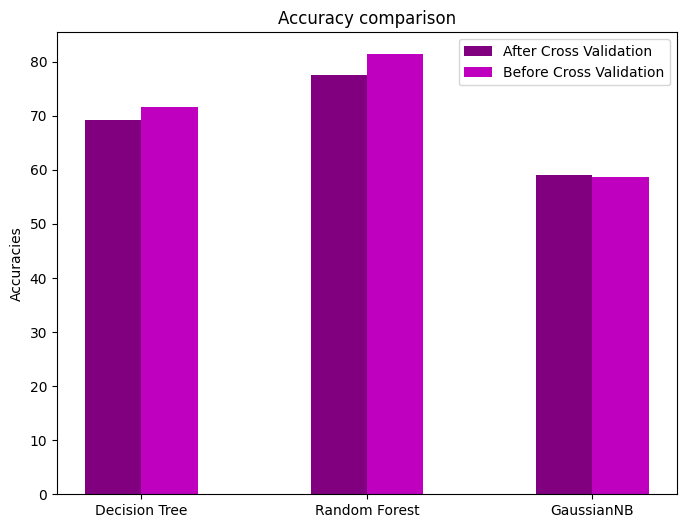

In [52]:
#Plotting all accuracies together for comparison 

labels = ['Decision Tree', 'Random Forest', 'GaussianNB']

NoCV = [71.65, 81.36, 58.63] # accuracy before Cross Validation
CV = [69.13, 77.6, 59.0] # accuracy after Cross Validation

x = np.arange(len(labels)) #the label locations
width = 0.25 # the width of the bars

f, ax = plt.subplots(figsize=(8,6))
p1 = ax.bar(x - width/2, CV, width, label='After Cross Validation', color='purple')
p2 = ax.bar(x + width/2, NoCV, width, label='Before Cross Validation', color='m')

# Add some text for labels and title 
ax.set_ylabel('Accuracies')
ax.set_title('Accuracy comparison')
ax.set_xticks(x)
plt.xticks()
ax.set_xticklabels(labels)
ax.legend(loc=1)
plt.show()

**On comparison, the accuracies do not seem to drastically change, but do seem a bit reduced after cross validation which means that K-fold cross validation is giving a better approximation for those accuracies. From the bar plot, Random Forest appears to be providing the better accuracies followed by Decision Tree in predicting the white wine quality. Using this outcome, Random forest and Decision Tree can be applied to the dataset.**